<a href="https://colab.research.google.com/github/666888rwy-bit/phy77/blob/main/Visualizing_of_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

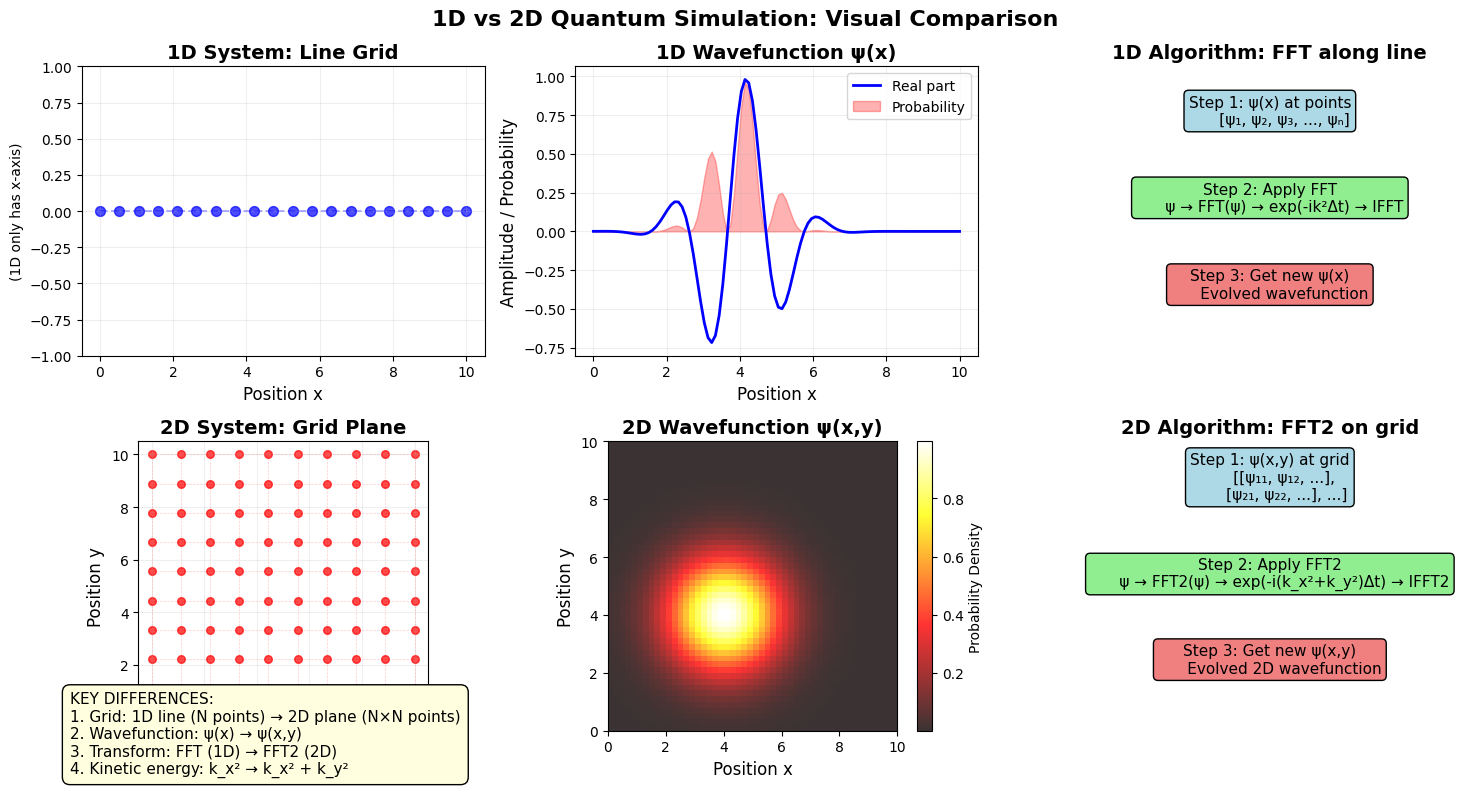

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
fig = plt.figure(figsize=(15, 8))

# ============================================================
# 1. 1D QUANTUM SYSTEM VISUALIZATION
# ============================================================
ax1 = plt.subplot(2, 3, 1)
ax1.set_title("1D System: Line Grid", fontsize=14, fontweight='bold')

# Create 1D grid points
x_1d = np.linspace(0, 10, 20)
ax1.scatter(x_1d, np.zeros_like(x_1d), s=50, color='blue', alpha=0.7)
ax1.plot(x_1d, np.zeros_like(x_1d), 'b--', alpha=0.3)
ax1.set_xlabel("Position x", fontsize=12)
ax1.set_ylabel("(1D only has x-axis)", fontsize=10)
ax1.set_ylim(-1, 1)
ax1.grid(True, alpha=0.2)

# Add wavefunction visualization
ax2 = plt.subplot(2, 3, 2)
ax2.set_title("1D Wavefunction ψ(x)", fontsize=14, fontweight='bold')

x = np.linspace(0, 10, 100)
psi_1d = np.exp(-(x-4)**2/2) * np.cos(3*x)  # Gaussian wavepacket
ax2.plot(x, psi_1d, 'b-', linewidth=2, label='Real part')
ax2.fill_between(x, 0, np.abs(psi_1d)**2, alpha=0.3, color='red', label='Probability')
ax2.set_xlabel("Position x", fontsize=12)
ax2.set_ylabel("Amplitude / Probability", fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.2)

# 1D algorithm visualization
ax3 = plt.subplot(2, 3, 3)
ax3.set_title("1D Algorithm: FFT along line", fontsize=14, fontweight='bold')
ax3.text(0.5, 0.8, "Step 1: ψ(x) at points\n      [ψ₁, ψ₂, ψ₃, ..., ψₙ]",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
ax3.text(0.5, 0.5, "Step 2: Apply FFT\n      ψ → FFT(ψ) → exp(-ik²Δt) → IFFT",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))
ax3.text(0.5, 0.2, "Step 3: Get new ψ(x)\n      Evolved wavefunction",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral'))
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')

# ============================================================
# 2. 2D QUANTUM SYSTEM VISUALIZATION
# ============================================================
ax4 = plt.subplot(2, 3, 4)
ax4.set_title("2D System: Grid Plane", fontsize=14, fontweight='bold')

# Create 2D grid points
x_2d = np.linspace(0, 10, 10)
y_2d = np.linspace(0, 10, 10)
X, Y = np.meshgrid(x_2d, y_2d)
ax4.scatter(X, Y, s=30, color='red', alpha=0.7)
ax4.set_xlabel("Position x", fontsize=12)
ax4.set_ylabel("Position y", fontsize=12)
ax4.grid(True, alpha=0.2)
ax4.set_aspect('equal')

# Add connecting lines to show grid
for i in range(10):
    ax4.plot(x_2d, np.ones_like(x_2d)*y_2d[i], 'r--', alpha=0.2, linewidth=0.5)
    ax4.plot(np.ones_like(y_2d)*x_2d[i], y_2d, 'r--', alpha=0.2, linewidth=0.5)

# 2D wavefunction visualization
ax5 = plt.subplot(2, 3, 5)
ax5.set_title("2D Wavefunction ψ(x,y)", fontsize=14, fontweight='bold')

# Create a 2D Gaussian wavepacket
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)
psi_2d = np.exp(-((X-4)**2 + (Y-4)**2)/4)  # 2D Gaussian

# Create heatmap
im = ax5.imshow(psi_2d, extent=[0, 10, 0, 10], origin='lower',
                cmap='hot', aspect='auto', alpha=0.8)
ax5.set_xlabel("Position x", fontsize=12)
ax5.set_ylabel("Position y", fontsize=12)
plt.colorbar(im, ax=ax5, label='Probability Density')
ax5.set_aspect('equal')

# 2D algorithm visualization
ax6 = plt.subplot(2, 3, 6)
ax6.set_title("2D Algorithm: FFT2 on grid", fontsize=14, fontweight='bold')
ax6.text(0.5, 0.8, "Step 1: ψ(x,y) at grid\n      [[ψ₁₁, ψ₁₂, ...],\n       [ψ₂₁, ψ₂₂, ...], ...]",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
ax6.text(0.5, 0.5, "Step 2: Apply FFT2\n      ψ → FFT2(ψ) → exp(-i(k_x²+k_y²)Δt) → IFFT2",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))
ax6.text(0.5, 0.2, "Step 3: Get new ψ(x,y)\n      Evolved 2D wavefunction",
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral'))
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)
ax6.axis('off')

# ============================================================
# 3. COMPARISON SUMMARY
# ============================================================
# Add text comparison
fig.text(0.05, 0.02,
         "KEY DIFFERENCES:\n"
         "1. Grid: 1D line (N points) → 2D plane (N×N points)\n"
         "2. Wavefunction: ψ(x) → ψ(x,y)\n"
         "3. Transform: FFT (1D) → FFT2 (2D)\n"
         "4. Kinetic energy: k_x² → k_x² + k_y²",
         fontsize=11, bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow'),
         verticalalignment='bottom')

plt.suptitle("1D vs 2D Quantum Simulation: Visual Comparison", fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


Generating visualizations for FFT and FDTD comparison...

VISUALIZATION 1: FFT - 3 Step Process


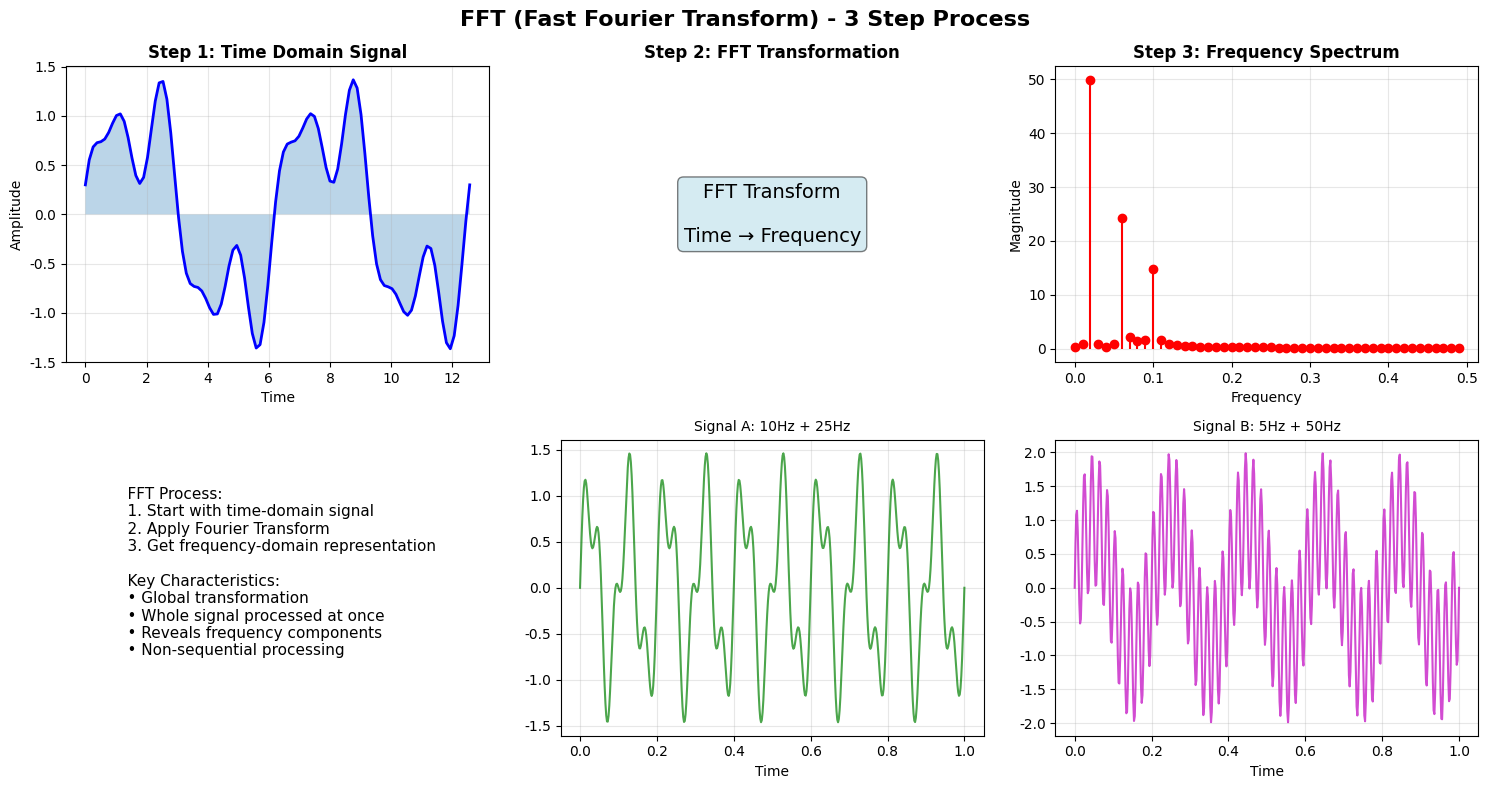


VISUALIZATION 2: FDTD - Discretization Approach


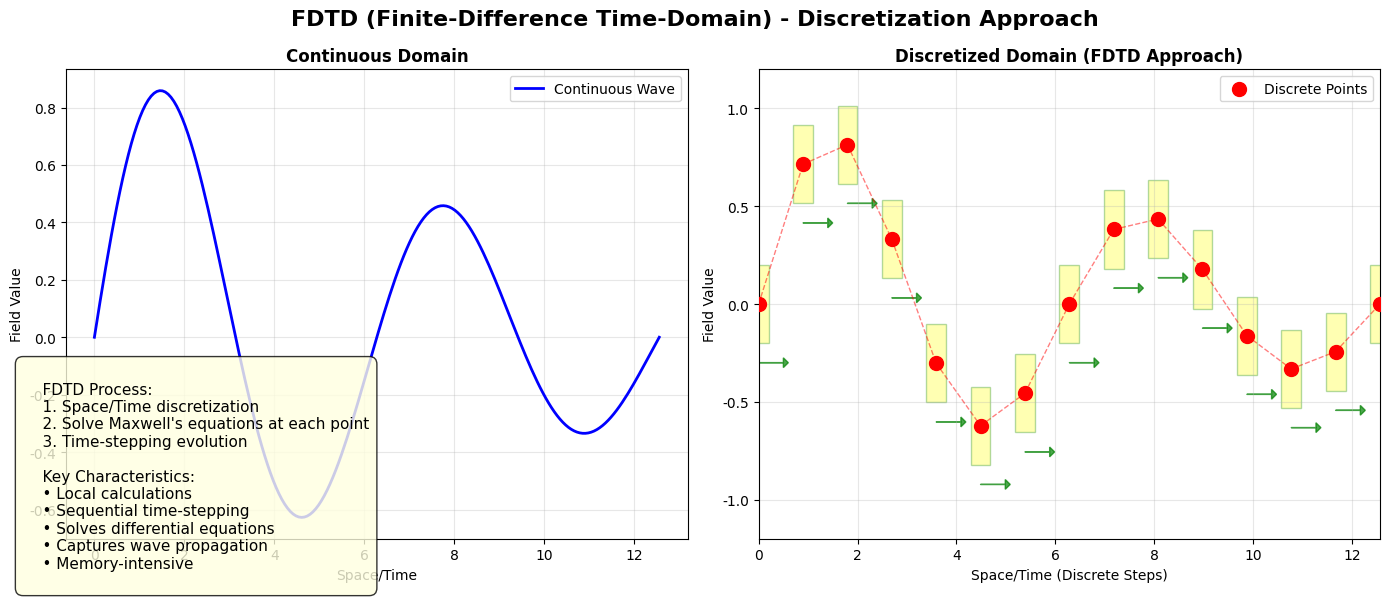


VISUALIZATION 3: Direct Comparison


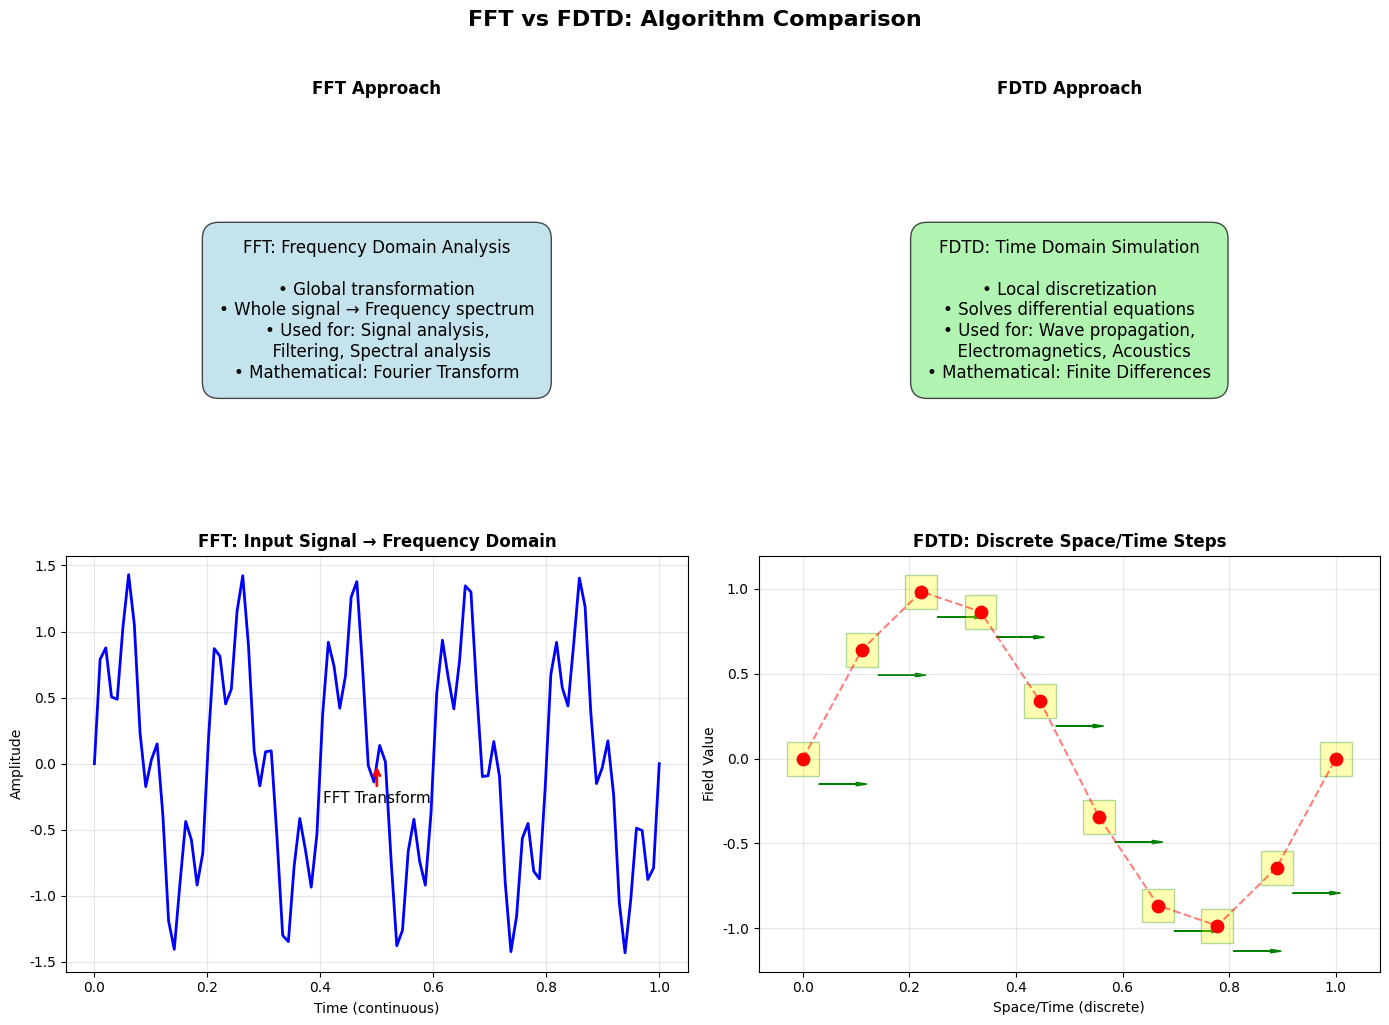


Visualization complete!

Key Differences Summary:
1. FFT: Global transformation, frequency domain analysis
2. FDTD: Local discretization, time domain simulation
3. FFT: Mathematical transform (integral)
4. FDTD: Numerical method (differential equations)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False


def create_demo_signal():
    x = np.linspace(0, 4*np.pi, 100)
    signal = np.sin(x) + 0.5*np.sin(3*x) + 0.3*np.cos(5*x)
    return x, signal

def visualize_fft():
    x, signal = create_demo_signal()

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle('FFT (Fast Fourier Transform) - 3 Step Process', fontsize=16, fontweight='bold')

    # Step 1: Time Domain Signal
    axes[0, 0].plot(x, signal, 'b-', linewidth=2)
    axes[0, 0].fill_between(x, signal, alpha=0.3)
    axes[0, 0].set_title('Step 1: Time Domain Signal', fontweight='bold')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].grid(True, alpha=0.3)

    # Step 2: Frequency Domain (FFT transformation)
    axes[0, 1].text(0.5, 0.5, 'FFT Transform\n\nTime → Frequency',
                    ha='center', va='center', fontsize=14,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
    axes[0, 1].set_title('Step 2: FFT Transformation', fontweight='bold')
    axes[0, 1].axis('off')

    # Step 3: Frequency Spectrum
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal))
    axes[0, 2].stem(freqs[:50], np.abs(fft_result[:50]), linefmt='r-', markerfmt='ro', basefmt=" ")
    axes[0, 2].set_title('Step 3: Frequency Spectrum', fontweight='bold')
    axes[0, 2].set_xlabel('Frequency')
    axes[0, 2].set_ylabel('Magnitude')
    axes[0, 2].grid(True, alpha=0.3)

    fft_explanation = """
    FFT Process:
    1. Start with time-domain signal
    2. Apply Fourier Transform
    3. Get frequency-domain representation

    Key Characteristics:
    • Global transformation
    • Whole signal processed at once
    • Reveals frequency components
    • Non-sequential processing
    """

    axes[1, 0].text(0.1, 0.9, fft_explanation, fontsize=11,
                   verticalalignment='top', transform=axes[1, 0].transAxes)
    axes[1, 0].axis('off')

    t = np.linspace(0, 1, 500)
    signal1 = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*25*t)
    signal2 = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*50*t)

    axes[1, 1].plot(t, signal1, 'g-', alpha=0.7)
    axes[1, 1].set_title('Signal A: 10Hz + 25Hz', fontsize=10)
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].grid(True, alpha=0.3)

    axes[1, 2].plot(t, signal2, 'm-', alpha=0.7)
    axes[1, 2].set_title('Signal B: 5Hz + 50Hz', fontsize=10)
    axes[1, 2].set_xlabel('Time')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def visualize_fdtd():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('FDTD (Finite-Difference Time-Domain) - Discretization Approach',
                 fontsize=16, fontweight='bold')

    x = np.linspace(0, 4*np.pi, 200)
    wave = np.sin(x) * np.exp(-0.1*x)

    ax1.plot(x, wave, 'b-', linewidth=2, label='Continuous Wave')
    ax1.set_title('Continuous Domain', fontweight='bold')
    ax1.set_xlabel('Space/Time')
    ax1.set_ylabel('Field Value')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    n_points = 15
    discrete_x = np.linspace(0, 4*np.pi, n_points)
    discrete_wave = np.sin(discrete_x) * np.exp(-0.1*discrete_x)


    ax2.scatter(discrete_x, discrete_wave, c='r', s=100, zorder=5, label='Discrete Points')

    for i in range(n_points-1):
        ax2.plot([discrete_x[i], discrete_x[i+1]],
                [discrete_wave[i], discrete_wave[i+1]],
                'r--', alpha=0.5, linewidth=1)

    for i, (dx, dy) in enumerate(zip(discrete_x, discrete_wave)):
        rect = Rectangle((dx-0.2, dy-0.2), 0.4, 0.4,
                        linewidth=1, edgecolor='g',
                        facecolor='yellow', alpha=0.3)
        ax2.add_patch(rect)

        if i < n_points-1:
            ax2.arrow(dx, dy-0.3, 0.5, 0, head_width=0.05,
                     head_length=0.1, fc='g', ec='g', alpha=0.7)

    ax2.set_xlim([0, 4*np.pi])
    ax2.set_ylim([-1.2, 1.2])
    ax2.set_title('Discretized Domain (FDTD Approach)', fontweight='bold')
    ax2.set_xlabel('Space/Time (Discrete Steps)')
    ax2.set_ylabel('Field Value')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    fdtd_explanation = """
    FDTD Process:
    1. Space/Time discretization
    2. Solve Maxwell's equations at each point
    3. Time-stepping evolution

    Key Characteristics:
    • Local calculations
    • Sequential time-stepping
    • Solves differential equations
    • Captures wave propagation
    • Memory-intensive
    """

    plt.figtext(0.02, 0.02, fdtd_explanation, fontsize=11,
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

    plt.tight_layout()
    plt.show()

def visualize_comparison():
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    axes[0, 0].axis('off')
    axes[0, 0].text(0.5, 0.5,
                    'FFT: Frequency Domain Analysis\n\n'
                    '• Global transformation\n'
                    '• Whole signal → Frequency spectrum\n'
                    '• Used for: Signal analysis,\n'
                    '  Filtering, Spectral analysis\n'
                    '• Mathematical: Fourier Transform',
                    ha='center', va='center', fontsize=12,
                    bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.7))
    axes[0, 0].set_title('FFT Approach', fontweight='bold')

    axes[0, 1].axis('off')
    axes[0, 1].text(0.5, 0.5,
                    'FDTD: Time Domain Simulation\n\n'
                    '• Local discretization\n'
                    '• Solves differential equations\n'
                    '• Used for: Wave propagation,\n'
                    '  Electromagnetics, Acoustics\n'
                    '• Mathematical: Finite Differences',
                    ha='center', va='center', fontsize=12,
                    bbox=dict(boxstyle="round,pad=1", facecolor="lightgreen", alpha=0.7))
    axes[0, 1].set_title('FDTD Approach', fontweight='bold')

    t = np.linspace(0, 1, 100)
    signal_fft = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t)

    axes[1, 0].plot(t, signal_fft, 'b-', linewidth=2)
    axes[1, 0].set_title('FFT: Input Signal → Frequency Domain', fontweight='bold')
    axes[1, 0].set_xlabel('Time (continuous)')
    axes[1, 0].set_ylabel('Amplitude')
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 0].annotate('FFT Transform', xy=(0.5, 0), xytext=(0.5, -0.3),
                       arrowprops=dict(arrowstyle='->', color='red', lw=2),
                       ha='center', fontsize=11)

    x_fdtd = np.linspace(0, 1, 10)
    y_fdtd = np.sin(2*np.pi*x_fdtd)

    axes[1, 1].scatter(x_fdtd, y_fdtd, c='r', s=80, zorder=5)
    axes[1, 1].plot(x_fdtd, y_fdtd, 'r--', alpha=0.5)

    for i in range(len(x_fdtd)):
        rect = Rectangle((x_fdtd[i]-0.03, y_fdtd[i]-0.1), 0.06, 0.2,
                        linewidth=1, edgecolor='g', facecolor='yellow', alpha=0.3)
        axes[1, 1].add_patch(rect)

        if i < len(x_fdtd)-1:

            axes[1, 1].arrow(x_fdtd[i]+0.03, y_fdtd[i]-0.15, 0.07, 0,
                           head_width=0.02, head_length=0.02, fc='g', ec='g')

    axes[1, 1].set_title('FDTD: Discrete Space/Time Steps', fontweight='bold')
    axes[1, 1].set_xlabel('Space/Time (discrete)')
    axes[1, 1].set_ylabel('Field Value')
    axes[1, 1].grid(True, alpha=0.3)

    plt.suptitle('FFT vs FDTD: Algorithm Comparison', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


def main():
    print("Generating visualizations for FFT and FDTD comparison...\n")

    print("="*60)
    print("VISUALIZATION 1: FFT - 3 Step Process")
    print("="*60)
    visualize_fft()

    print("\n" + "="*60)
    print("VISUALIZATION 2: FDTD - Discretization Approach")
    print("="*60)
    visualize_fdtd()

    print("\n" + "="*60)
    print("VISUALIZATION 3: Direct Comparison")
    print("="*60)
    visualize_comparison()

    print("\nVisualization complete!")
    print("\nKey Differences Summary:")
    print("1. FFT: Global transformation, frequency domain analysis")
    print("2. FDTD: Local discretization, time domain simulation")
    print("3. FFT: Mathematical transform (integral)")
    print("4. FDTD: Numerical method (differential equations)")

if __name__ == "__main__":
    main()

Generating 2D visualizations for FFT and FDTD comparison...

2D FDTD VISUALIZATION: Spatial Discretization & Time Stepping


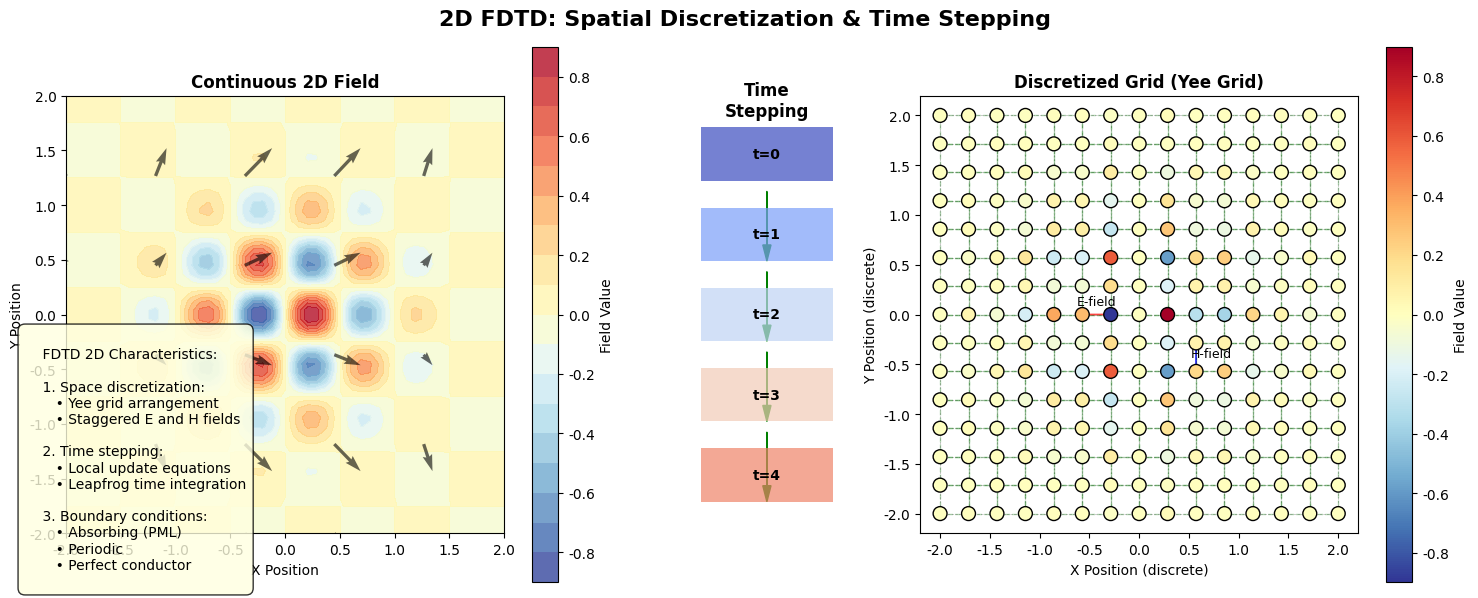


2D FFT VISUALIZATION: Spatial to Frequency Domain Transformation


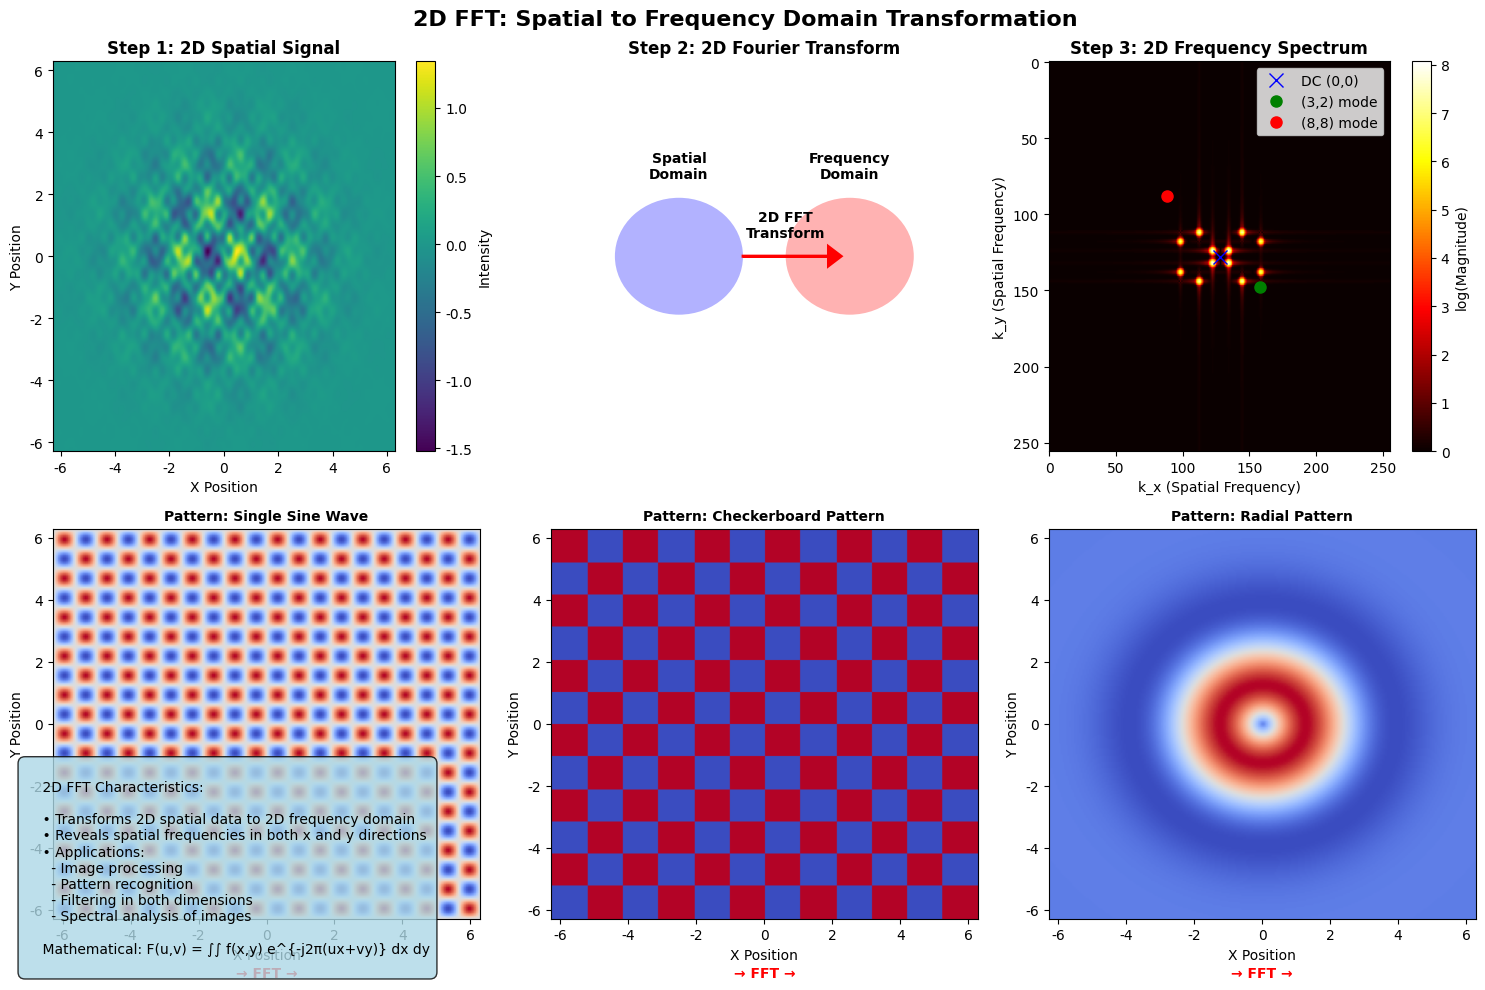


2D METHODS COMPARISON: FFT vs FDTD


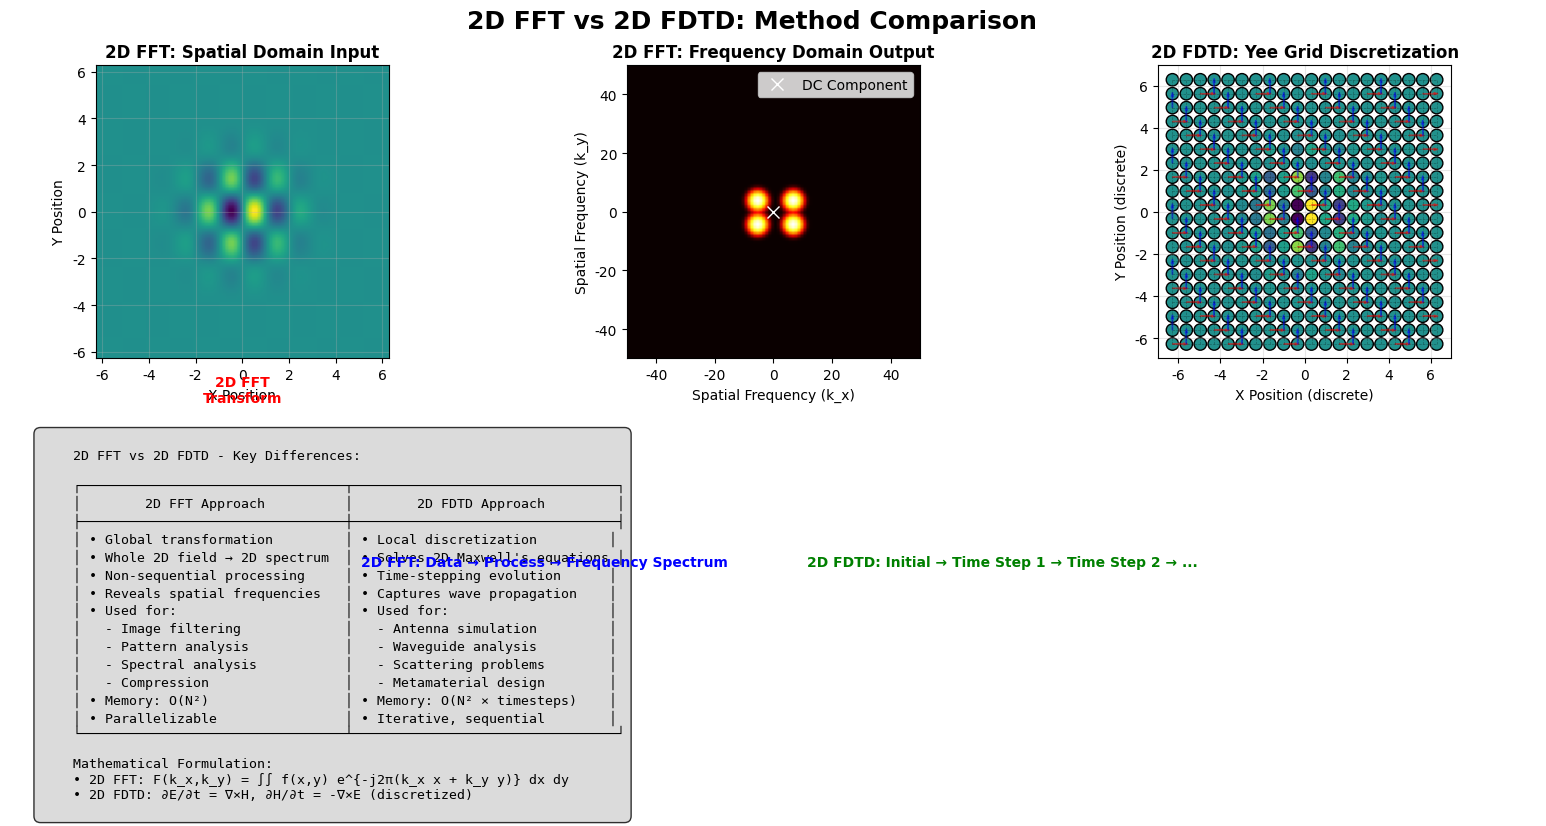


2D Visualization complete!

Summary of 2D Case Differences:
1. 2D FFT: Global 2D transform, reveals spatial frequencies in k-space
2. 2D FDTD: 2D Yee grid discretization, solves 2D wave equations
3. 2D FFT: Used for image processing, pattern recognition
4. 2D FDTD: Used for 2D waveguide simulation, antenna design


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Arrow
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec


def create_2d_data():
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    Z1 = np.exp(-(X-1)**2 - (Y-1)**2) * np.sin(5*X + 3*Y)
    Z2 = np.exp(-(X+1)**2 - (Y+1)**2) * np.cos(3*X - 2*Y)
    Z = Z1 + 0.5*Z2

    return X, Y, Z

def visualize_2d_fdtd():
    fig = plt.figure(figsize=(15, 6))
    gs = GridSpec(1, 3, width_ratios=[1, 0.3, 1], figure=fig)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])

    fig.suptitle('2D FDTD: Spatial Discretization & Time Stepping', fontsize=16, fontweight='bold')

    x = np.linspace(-2, 2, 50)
    y = np.linspace(-2, 2, 50)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(2*np.pi*X) * np.cos(2*np.pi*Y) * np.exp(-(X**2 + Y**2))

    contour = ax1.contourf(X, Y, Z, levels=20, cmap='RdYlBu_r', alpha=0.8)
    ax1.set_title('Continuous 2D Field', fontweight='bold')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_aspect('equal')
    plt.colorbar(contour, ax=ax1, label='Field Value')

    ax1.quiver(X[::10, ::10], Y[::10, ::10],
               np.cos(X[::10, ::10]), np.sin(Y[::10, ::10]),
               color='black', alpha=0.6, scale=15)

    ax2.axis('off')
    time_steps = 5
    for i in range(time_steps):
        y_pos = 0.8 - i * 0.15
        rect = Rectangle((0.1, y_pos-0.05), 0.8, 0.1,
                        facecolor=cm.coolwarm(i/time_steps), alpha=0.7)
        ax2.add_patch(rect)
        ax2.text(0.5, y_pos, f't={i}', ha='center', va='center', fontweight='bold')

        if i < time_steps-1:
            ax2.arrow(0.5, y_pos-0.07, 0, -0.1,
                     head_width=0.05, head_length=0.03, fc='g', ec='g')

    ax2.text(0.5, 0.9, 'Time\nStepping', ha='center', va='center',
             fontweight='bold', fontsize=12)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)

    grid_size = 15
    x_disc = np.linspace(-2, 2, grid_size)
    y_disc = np.linspace(-2, 2, grid_size)
    X_disc, Y_disc = np.meshgrid(x_disc, y_disc)

    Z_disc = np.sin(2*np.pi*X_disc) * np.cos(2*np.pi*Y_disc) * np.exp(-(X_disc**2 + Y_disc**2))

    scatter = ax3.scatter(X_disc, Y_disc, c=Z_disc, s=100, cmap='RdYlBu_r',
                          edgecolors='black', linewidth=1, zorder=5)

    for i in range(grid_size):
        ax3.plot(x_disc, np.ones_like(x_disc)*y_disc[i], 'k--', alpha=0.3, linewidth=0.5)
        ax3.plot(np.ones_like(y_disc)*x_disc[i], y_disc, 'k--', alpha=0.3, linewidth=0.5)

    for i in range(grid_size-1):
        for j in range(grid_size-1):
            rect = Rectangle((x_disc[i], y_disc[j]),
                           x_disc[i+1]-x_disc[i],
                           y_disc[j+1]-y_disc[j],
                           linewidth=1, edgecolor='green',
                           facecolor='none', alpha=0.3, linestyle='--')
            ax3.add_patch(rect)

    ax3.arrow(x_disc[5], y_disc[7], x_disc[6]-x_disc[5], 0,
              head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.7)
    ax3.text((x_disc[5] + x_disc[6]) / 2, y_disc[7]+0.1, 'E-field', ha='center', fontsize=9)

    ax3.arrow(x_disc[9], y_disc[5], 0, y_disc[6]-y_disc[5],
              head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.7)
    ax3.text(x_disc[9]+0.15, (y_disc[5] + y_disc[6]) / 2, 'H-field', ha='center', fontsize=9)

    ax3.set_title('Discretized Grid (Yee Grid)', fontweight='bold')
    ax3.set_xlabel('X Position (discrete)')
    ax3.set_ylabel('Y Position (discrete)')
    ax3.set_aspect('equal')
    plt.colorbar(scatter, ax=ax3, label='Field Value')

    explanation_text = """
    FDTD 2D Characteristics:

    1. Space discretization:
       • Yee grid arrangement
       • Staggered E and H fields

    2. Time stepping:
       • Local update equations
       • Leapfrog time integration

    3. Boundary conditions:
       • Absorbing (PML)
       • Periodic
       • Perfect conductor
    """

    plt.figtext(0.02, 0.02, explanation_text, fontsize=10,
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

    plt.tight_layout()
    plt.show()

def visualize_2d_fft():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('2D FFT: Spatial to Frequency Domain Transformation', fontsize=16, fontweight='bold')

    x = np.linspace(-2*np.pi, 2*np.pi, 256)
    y = np.linspace(-2*np.pi, 2*np.pi, 256)
    X, Y = np.meshgrid(x, y)

    spatial_signal = (np.sin(3*X) * np.cos(2*Y) +
                      0.5*np.sin(8*X) * np.sin(8*Y) +
                      0.3*np.cos(15*X) * np.cos(5*Y))

    spatial_signal *= np.exp(-(X**2 + Y**2)/10)

    im1 = axes[0, 0].imshow(spatial_signal, extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi],
                           cmap='viridis', aspect='auto')
    axes[0, 0].set_title('Step 1: 2D Spatial Signal', fontweight='bold')
    axes[0, 0].set_xlabel('X Position')
    axes[0, 0].set_ylabel('Y Position')
    plt.colorbar(im1, ax=axes[0, 0], label='Intensity')

    axes[0, 1].axis('off')

    circle_space = Circle((0.3, 0.5), 0.15, facecolor='blue', alpha=0.3)
    axes[0, 1].add_patch(circle_space)
    axes[0, 1].text(0.3, 0.7, 'Spatial\nDomain', ha='center', fontweight='bold')

    axes[0, 1].arrow(0.45, 0.5, 0.2, 0, head_width=0.05, head_length=0.03,
                    fc='red', ec='red', linewidth=2)
    axes[0, 1].text(0.55, 0.55, '2D FFT\nTransform', ha='center', fontweight='bold')

    circle_freq = Circle((0.7, 0.5), 0.15, facecolor='red', alpha=0.3)
    axes[0, 1].add_patch(circle_freq)
    axes[0, 1].text(0.7, 0.7, 'Frequency\nDomain', ha='center', fontweight='bold')

    axes[0, 1].set_xlim(0, 1)
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].set_title('Step 2: 2D Fourier Transform', fontweight='bold')

    fft_2d = np.fft.fftshift(np.fft.fft2(spatial_signal))
    magnitude_spectrum = np.abs(fft_2d)

    im3 = axes[0, 2].imshow(np.log1p(magnitude_spectrum), cmap='hot', aspect='auto')
    axes[0, 2].set_title('Step 3: 2D Frequency Spectrum', fontweight='bold')
    axes[0, 2].set_xlabel('k_x (Spatial Frequency)')
    axes[0, 2].set_ylabel('k_y (Spatial Frequency)')
    plt.colorbar(im3, ax=axes[0, 2], label='log(Magnitude)')

    center = np.array(fft_2d.shape) // 2
    axes[0, 2].plot(center[1], center[0], 'bx', markersize=10, label='DC (0,0)')
    axes[0, 2].plot(center[1] + 30, center[0] + 20, 'go', markersize=8, label='(3,2) mode')
    axes[0, 2].plot(center[1] - 40, center[0] - 40, 'ro', markersize=8, label='(8,8) mode')
    axes[0, 2].legend(loc='upper right')

    modes = [
        ('Single Sine Wave', np.sin(5*X) * np.sin(5*Y)),
        ('Checkerboard Pattern', np.sign(np.sin(3*X) * np.sin(3*Y))),
        ('Radial Pattern', np.sin(np.sqrt(X**2 + Y**2)) * np.exp(-(X**2 + Y**2)/8))
    ]

    for idx, (title, pattern) in enumerate(modes):

        im_pattern = axes[1, idx].imshow(pattern, cmap='coolwarm', aspect='auto',
                                        extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
        axes[1, idx].set_title(f'Pattern: {title}', fontsize=10, fontweight='bold')
        axes[1, idx].set_xlabel('X Position')
        axes[1, idx].set_ylabel('Y Position')

        axes[1, idx].annotate('→ FFT →', xy=(0.5, -0.15), xycoords='axes fraction',
                             ha='center', fontweight='bold', color='red')

    fft_2d_explanation = """
    2D FFT Characteristics:

    • Transforms 2D spatial data to 2D frequency domain
    • Reveals spatial frequencies in both x and y directions
    • Applications:
      - Image processing
      - Pattern recognition
      - Filtering in both dimensions
      - Spectral analysis of images

    Mathematical: F(u,v) = ∫∫ f(x,y) e^{-j2π(ux+vy)} dx dy
    """

    plt.figtext(0.02, 0.02, fft_2d_explanation, fontsize=10,
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.show()

def compare_2d_methods():
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(2, 3, height_ratios=[1, 0.5], figure=fig)

    fig.suptitle('2D FFT vs 2D FDTD: Method Comparison', fontsize=18, fontweight='bold')

    ax_fft_space = fig.add_subplot(gs[0, 0])
    ax_fft_freq = fig.add_subplot(gs[0, 1])
    ax_fdtd_grid = fig.add_subplot(gs[0, 2])
    ax_comparison = fig.add_subplot(gs[1, :])

    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    y = np.linspace(-2*np.pi, 2*np.pi, 100)
    X, Y = np.meshgrid(x, y)

    wave_field = np.sin(3*X) * np.cos(2*Y) * np.exp(-(X**2 + Y**2)/4)

    im1 = ax_fft_space.imshow(wave_field, cmap='viridis', extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    ax_fft_space.set_title('2D FFT: Spatial Domain Input', fontweight='bold')
    ax_fft_space.set_xlabel('X Position')
    ax_fft_space.set_ylabel('Y Position')
    ax_fft_space.grid(True, alpha=0.3)

    ax_fft_space.annotate('2D FFT\nTransform', xy=(0.5, -0.15), xycoords='axes fraction',
                         ha='center', fontweight='bold', color='red', fontsize=10)

    fft_2d = np.fft.fftshift(np.fft.fft2(wave_field))
    magnitude = np.log1p(np.abs(fft_2d))

    im2 = ax_fft_freq.imshow(magnitude, cmap='hot', extent=[-50, 50, -50, 50])
    ax_fft_freq.set_title('2D FFT: Frequency Domain Output', fontweight='bold')
    ax_fft_freq.set_xlabel('Spatial Frequency (k_x)')
    ax_fft_freq.set_ylabel('Spatial Frequency (k_y)')

    center = np.array(magnitude.shape) // 2
    ax_fft_freq.plot(0, 0, 'wx', markersize=8, label='DC Component')
    ax_fft_freq.legend()

    grid_size = 20
    x_grid = np.linspace(-2*np.pi, 2*np.pi, grid_size)
    y_grid = np.linspace(-2*np.pi, 2*np.pi, grid_size)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

    Z_grid = np.sin(3*X_grid) * np.cos(2*Y_grid) * np.exp(-(X_grid**2 + Y_grid**2)/4)

    scatter = ax_fdtd_grid.scatter(X_grid, Y_grid, c=Z_grid, s=80, cmap='viridis',
                                  edgecolors='black', linewidth=1)

    for i in range(grid_size):
        ax_fdtd_grid.plot(x_grid, np.ones_like(x_grid)*y_grid[i], 'k--', alpha=0.3, linewidth=0.5)
        ax_fdtd_grid.plot(np.ones_like(y_grid)*x_grid[i], y_grid, 'k--', alpha=0.3, linewidth=0.5)

    for i in range(grid_size-1):
        for j in range(grid_size-1):

            if (i+j) % 4 == 0:
                ax_fdtd_grid.arrow(x_grid[i], y_grid[j],
                                  (x_grid[i+1]-x_grid[i])*0.8, 0,
                                  head_width=0.1, head_length=0.2, fc='red', ec='red', alpha=0.5)
            elif (i+j) % 4 == 1:
                ax_fdtd_grid.arrow(x_grid[i], y_grid[j],
                                  0, (y_grid[j+1]-y_grid[j])*0.8,
                                  head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha=0.5)

    ax_fdtd_grid.set_title('2D FDTD: Yee Grid Discretization', fontweight='bold')
    ax_fdtd_grid.set_xlabel('X Position (discrete)')
    ax_fdtd_grid.set_ylabel('Y Position (discrete)')
    ax_fdtd_grid.set_aspect('equal')
    ax_fdtd_grid.grid(True, alpha=0.3)

    ax_comparison.axis('off')

    comparison_text = """
    2D FFT vs 2D FDTD - Key Differences:

    ┌─────────────────────────────────┬─────────────────────────────────┐
    │        2D FFT Approach          │        2D FDTD Approach         │
    ├─────────────────────────────────┼─────────────────────────────────┤
    │ • Global transformation         │ • Local discretization         │
    │ • Whole 2D field → 2D spectrum  │ • Solves 2D Maxwell's equations │
    │ • Non-sequential processing     │ • Time-stepping evolution      │
    │ • Reveals spatial frequencies   │ • Captures wave propagation    │
    │ • Used for:                     │ • Used for:                    │
    │   - Image filtering             │   - Antenna simulation         │
    │   - Pattern analysis            │   - Waveguide analysis         │
    │   - Spectral analysis           │   - Scattering problems        │
    │   - Compression                 │   - Metamaterial design        │
    │ • Memory: O(N²)                 │ • Memory: O(N² × timesteps)    │
    │ • Parallelizable                │ • Iterative, sequential        │
    └─────────────────────────────────┴─────────────────────────────────┘

    Mathematical Formulation:
    • 2D FFT: F(k_x,k_y) = ∫∫ f(x,y) e^{-j2π(k_x x + k_y y)} dx dy
    • 2D FDTD: ∂E/∂t = ∇×H, ∂H/∂t = -∇×E (discretized)
    """

    ax_comparison.text(0.02, 0.95, comparison_text, fontsize=9.5, family='monospace',
                      verticalalignment='top', transform=ax_comparison.transAxes,
                      bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

    ax_comparison.text(0.35, 0.05, '2D FFT: Data → Process → Frequency Spectrum',
                      ha='center', fontweight='bold', color='blue', fontsize=10)
    ax_comparison.text(0.65, 0.05, '2D FDTD: Initial → Time Step 1 → Time Step 2 → ...',
                      ha='center', fontweight='bold', color='green', fontsize=10)

    plt.tight_layout()
    plt.show()

def main():
    print("Generating 2D visualizations for FFT and FDTD comparison...\n")

    print("="*70)
    print("2D FDTD VISUALIZATION: Spatial Discretization & Time Stepping")
    print("="*70)
    visualize_2d_fdtd()

    print("\n" + "="*70)
    print("2D FFT VISUALIZATION: Spatial to Frequency Domain Transformation")
    print("="*70)
    visualize_2d_fft()

    print("\n" + "="*70)
    print("2D METHODS COMPARISON: FFT vs FDTD")
    print("="*70)
    compare_2d_methods()

    print("\n2D Visualization complete!")
    print("\nSummary of 2D Case Differences:")
    print("1. 2D FFT: Global 2D transform, reveals spatial frequencies in k-space")
    print("2. 2D FDTD: 2D Yee grid discretization, solves 2D wave equations")
    print("3. 2D FFT: Used for image processing, pattern recognition")
    print("4. 2D FDTD: Used for 2D waveguide simulation, antenna design")

if __name__ == "__main__":
    main()